## Fundamentals of Data Analysis Project
#### Hayley Doherty G00387849
---

The aim of this project is to perform linear regression on a given dataset such that it will allow the accurate prediction of power output from wind speed values.  Linear regression is a method used to model the relationship between a response and one or more explanatory variables [1].  If two variables are related, this means that when one changes by a certain amount, the other also changes by a certain amount.  When written in terms of x and y, with y being the response variable, this relationship is described as the regression of y on x.  In this context, the term regression means that y is a function of x and changes with x [2].  A linear regression model with 1 dependent variable and more than 1 independent variables is called a multiple linear regression and the third type of regression is non-linear regression which assumes that the relationship between the dependent and independent variables is non-linear [7]. The three major uses for regression analysis are determining the strength of predictors, forecasting an effect and trend forecasting and is regularly used for biological, economic and engineering purposes [8]. 

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import default_rng
rng = default_rng()
import sklearn.linear_model as lm

### Analysis of raw data
***

In [145]:
df = pd.read_csv('powerproduction.csv')
x = df['speed']
x = np.array(x)
y = df['power']
y = np.array(y)

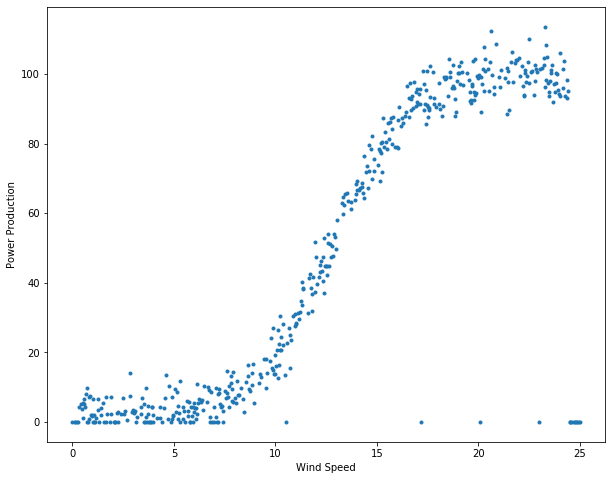

In [81]:
plt.figure(figsize=(10,8))
plt.plot(x, y, '.', label = "Data")
plt.xlabel('Wind Speed')
plt.ylabel('Power Production')
plt.show()

<br>

#### Numpy polyfit 
***
The Numpy polyfit function creates a least squares ploynomial fit.  It returns coefficients that can be used to calculate y from x, as expressed by the equation $y = mx+c$.  Thus the coefficients returned by Numpy polyfit can be substituted for $m$ and $c$ to calculate y.  This means that they can also be used to predict output from a given input.

In [82]:
coeffs = np.polyfit(x, y, 1)
coeffs

array([  4.91759567, -13.89990263])

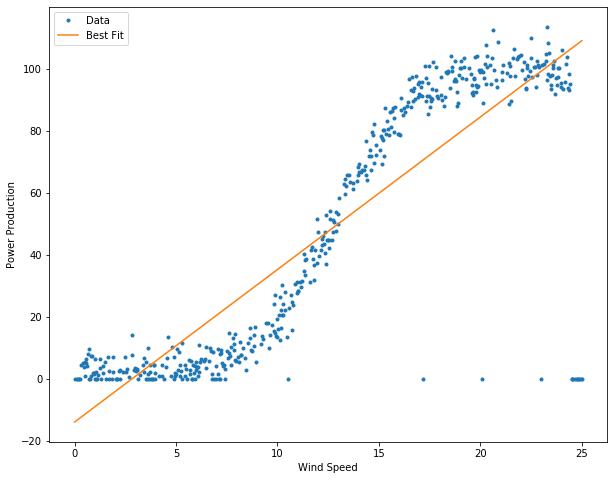

In [83]:
plt.figure(figsize=(10, 8))
plt.plot(x, y, '.', label = "Data")
plt.plot(x, coeffs[0] * x + coeffs[1], '-', label = "Best Fit")
plt.xlabel('Wind Speed')
plt.ylabel('Power Production')
plt.legend()
plt.show()

In [85]:
pred1 = coeffs[0] * 15 + coeffs[1]
pred1

59.86403235055045

Calculating the best values for m and c without using polyfit.  The values obtained are very similar to those output by the polyfit function.

In [55]:
# Calculating means
x_avg = np.mean(x)
y_avg = np.mean(y)
# Subtract means for x and y
x_zero = x- x_avg
y_zero = y- y_avg
# best value for m
m = np.sum(x_zero * y_zero) / np.sum(x_zero * x_zero)
# calculate the best c using m
c = y_avg - m * x_avg
print("m is %8.6f and c is %6.6f." % (m, c))

m is 4.917596 and c is -13.899903.


Calculating the cost of the model.  The cost refers to the performance of a model and does this by quantifying the error between the values predicted by the model and the actual values [6].   

In [56]:
# equation for calculating cost
cost = lambda m,c: np.sum([(y[i] - m * x[i] - c)**2 for i in range(x.size)])

print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (4.9176, -13.8999, cost(4.9176, -13.8999)))

Cost with m =  4.92 and c = -13.90: 234241.16


<br>

#### Sklearn
***

In [181]:
x = x.reshape(-1, 1)

In [136]:
# creating model
m = lm.LinearRegression()

In [149]:
# training the model
m.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

The intercept calculated by Sklearn is equivalent to c in the equation for a line.  Therefore when x =0 this model predicts the response to be -22.551 [3].  

In [150]:
m.intercept_

-22.550828482729848

The coefficient value is that which the response changes when x is increased by 1 [4]. 

In [151]:
m.coef_

array([6.0025154])

The score function returns the coefficient of determination, also called $R^2$.  This represents the proportion of variance in the dependent variable that is predictable for the independent variable, in other words how accurate our model is at predicting values for y [5].

In [152]:
m.score(x, y)

0.6789413318750794

In [140]:
# making predictions for x
y_pred = m.predict(x)
y_pred

array([[ 96.8692154 ],
       [ 97.16934117],
       [ 97.31940405],
       [ 97.76959271],
       [ 98.06971848],
       [ 98.21978136],
       [ 98.36984425],
       [ 98.51990713],
       [ 98.8200329 ],
       [ 99.12015867],
       [ 99.27022156],
       [ 99.42028444],
       [ 99.57034733],
       [100.32066175],
       [100.62679004],
       [100.92691581],
       [101.37710446],
       [101.52716735],
       [102.12741889],
       [102.27748177],
       [102.72767043],
       [103.77811062],
       [103.92817351],
       [104.22829928],
       [105.42880236],
       [105.87899101],
       [106.0290539 ],
       [106.17911678],
       [106.32917967],
       [106.47924255],
       [107.23555949],
       [107.53568526],
       [107.83581103],
       [108.43606257],
       [108.58612546],
       [109.03631411],
       [109.63656565],
       [109.93669142],
       [110.38688008],
       [110.83706873],
       [110.98713162],
       [111.1371945 ],
       [111.28725739],
       [111

Below the model is used to predict power output for a single wind speed value.  The value predicted here is much higher compared to that predicted using the coefficients produced using NumPy polyfit, with th epredicted power output from that method being 59.864 for the same wind speed value.

In [141]:
pred = [15.00]
power = m.predict([pred])
power

array([[67.48690252]])

<br>

### Analysis of cleaned data
***

The analysis below is performed on the same dataset but with some points removed as these were deemed to be outliers.  Specifically any points where the wind speed at at 5 or above and the power output is equal to 0 have been removed.  This is because it is likely that the turbines were not on or not working at these times as we would expect to see some level of power production when wind speed is at 5 or above.  All of the same analytical techniques were used as above.

In [3]:
df

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


In [190]:
# any empty rows are deleted
df = df.dropna(how='all')
# rows in which power equals 0 but wind speed is at or above 5 ar also removed
drop_rows = df[(df['power']==0) & (df['speed'] >= 5.0)].index
df.drop(drop_rows, inplace = True)

In [74]:
# we are left with 477 rows in the dataset
df

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
...,...,...
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223


In [191]:
x = np.array(df['speed'])
y = np.array(df['power'])

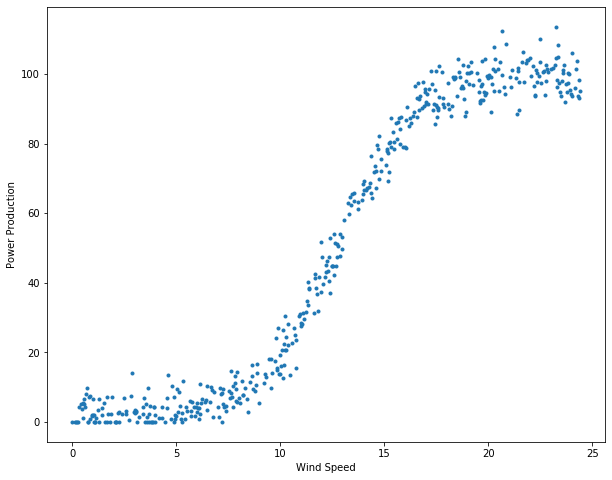

In [88]:
# plotting dataset with outliers removed
plt.figure(figsize=(10, 8))
plt.plot(x, y, '.')
plt.xlabel('Wind Speed')
plt.ylabel('Power Production')
plt.show()

In [192]:
# NumPy polyfit is used to calculate new coefficients
coeffs = np.polyfit(x, y, 1)
coeffs

array([  5.51397652, -18.08944823])

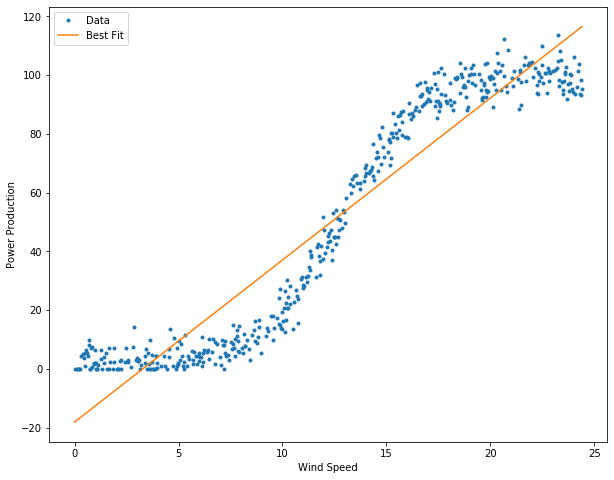

In [90]:
# plotting dataset with re-calculated line of best fit according to Numpy polyfit
plt.figure(figsize=(10, 8))
plt.plot(x, y, '.', label = "Data")
plt.plot(x, coeffs[0] * x + coeffs[1], '-', label = "Best Fit")
plt.xlabel('Wind Speed')
plt.ylabel('Power Production')
plt.legend()
plt.show()

For the raw data above when we used the coefficients to predict power production from a wind speed of 15, 59.86 was the result.  Now with the outliers removed from the data, the prediction has increased to 64.620.

In [193]:
pred1 = coeffs[0] * 15 + coeffs[1]
pred1

64.62019956626966

<br>

#### Sklearn
***

In [194]:
# creating the model
m = lm.LinearRegression()

In [195]:
x = x.reshape(-1, 1)

In [196]:
# Training the model
m.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [175]:
# using the model to predict the values of y for given x values
y_pred = m.predict(x)
y_pred

array([-18.08944823, -17.40020117, -17.26235175, -16.84880351,
       -16.57310469, -16.29740586, -15.88385762, -15.6081588 ,
       -15.32694599, -15.18909658, -15.05124717, -14.91339776,
       -14.63769893, -14.3620001 , -14.22415069, -14.08630128,
       -13.94845186, -13.67275304, -13.53490363, -13.39705421,
       -12.98350597, -12.84565656, -12.70780715, -12.56995773,
       -12.43210832, -12.29425891, -12.1564095 , -12.01856008,
       -11.74286126, -11.1914636 , -11.05361419, -10.91576478,
       -10.36436713, -10.22651771,  -9.8074555 ,  -9.53175667,
        -8.98035902,  -8.84250961,  -8.70466019,  -8.01541313,
        -7.7397143 ,  -7.60186489,  -6.91261783,  -6.636919  ,
        -6.49906959,  -6.08552135,  -5.80982252,  -5.67197311,
        -4.84487663,  -4.43132839,  -4.01226618,  -3.87441676,
        -3.1851697 ,  -2.49592263,  -2.35807322,  -1.80667557,
        -1.53097674,  -1.39312733,  -1.25527792,  -1.1174285 ,
        -0.84172968,  -0.42818144,   0.53676445,   0.67

Before the outliers were removed from the dataset, the model produced by the Sklearn linear regression function predicted power production to be 67.487.  Here it is predicted to be 64.620 for the same wind speed value.  These values are much closer compared to the values predicted by Numpy on the raw dataset and the data with outliers removed.

In [197]:
# using the model to predict power production when wind speed is 15
pred = [15]
power2 = m.predict([pred])
power2

array([64.62019957])

In [187]:
# calculating the intercept, c
m.intercept_

-18.089448231194723

In [188]:
# calculating the coefficient, m
m.coef_

array([5.51397652])

The score calculated below is better compared to that score calculaed for the raw data above, 0.6789 vs. 0.9033.  This must be dure to teh removal of the outlying data points which enables the model to make more accurate predictions.

In [189]:
# calculating the score
m.score(x, y)

0.9033294610539289

***
<br>

### References
[1]. Linear Regression, https://en.wikipedia.org/wiki/Linear_regression

[2]. Correlation and Regression, https://www.bmj.com/about-bmj/resources-readers/publications/statistics-square-one/11-correlation-and-regression

[3]. Linear Regression in Python, https://realpython.com/linear-regression-in-python/#simple-linear-regression-with-scikit-learn

[4]. Scikit Learn- Linear Regression, https://www.tutorialspoint.com/scikit_learn/scikit_learn_linear_regression.htm

[5]. Coefficient of Determination, https://en.wikipedia.org/wiki/Coefficient_of_determination

[6]. Linear Regression: Cost Function, https://towardsdatascience.com/coding-deep-learning-for-beginners-linear-regression-part-2-cost-function-49545303d29f

[7]. Xin Yan, 2009, Linear Regression Analysis: Theory and Computing

[8]. What is Linear Regression?, https://www.statisticssolutions.com/what-is-linear-regression/#:~:text=Three%20major%20uses%20for%20regression,have%20on%20a%20dependent%20variable.